In [9]:
import requests
import urllib.request
from bs4 import BeautifulSoup

In [17]:
url = 'http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList'

In [18]:
resp = requests.get(url)
resp

<Response [200]>

In [19]:
resp.text

'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>30</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'

In [20]:
urllib.parse.urlparse(url)

ParseResult(scheme='http', netloc='apis.data.go.kr', path='/B500001/drghtIdexSpiAnals/analsInfoList', params='', query='', fragment='')

urllib.parse.unquote()

인코딩된 코드(특수문자들이 특정한 문자로 치환된)를 파라미터의 속해있는 모듈은 자동적으로 인코딩되는데, 중복적으로 인코딩되는 것을 방지하기 위해, 디코딩해서 파라미터에 넣어줌

In [21]:
urllib.parse.unquote('sud4Cx%2FZUY2peBPsWdDK0ws3lvycYV5QHrKidHdRG2H4awUv9rnEbRerVKv%2B%2BjCSBd%2BwwNp%2BFkyT3vtIExFiaw%3D%3D')

'sud4Cx/ZUY2peBPsWdDK0ws3lvycYV5QHrKidHdRG2H4awUv9rnEbRerVKv++jCSBd+wwNp+FkyT3vtIExFiaw=='

In [106]:
params = {
    'hjdCd':'1168058000',
    'stDt':'20100501',
    'edDt':'20190531',
    'numOfRows':10,
    'pageNo':1,
    'serviceKey':'sud4Cx/ZUY2peBPsWdDK0ws3lvycYV5QHrKidHdRG2H4awUv9rnEbRerVKv++jCSBd+wwNp+FkyT3vtIExFiaw=='
}

In [107]:
resp = requests.get(url,params)
resp.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><anldt>20130101</anldt><anlrst>보통습윤</anlrst><anlval>1.23</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130101</anldt><anlrst>보통습윤</anlrst><anlval>1.38</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130102</anldt><anlrst>보통습윤</anlrst><anlval>1.4</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130102</anldt><anlrst>보통습윤</anlrst><anlval>1.08</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130103</anldt><anlrst>정상</anlrst><anlval>0.73</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130103</anldt><anlrst>보통습윤</anlrst><anlval>1.44</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130104</anldt><anlrst>보통습윤</anlrst><anlval>1.42</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130104</anldt><

In [108]:
soup = BeautifulSoup(resp.text)
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><anldt>20130101</anldt><anlrst>보통습윤</anlrst><anlval>1.23</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130101</anldt><anlrst>보통습윤</anlrst><anlval>1.38</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130102</anldt><anlrst>보통습윤</anlrst><anlval>1.4</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130102</anldt><anlrst>보통습윤</anlrst><anlval>1.08</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130103</anldt><anlrst>정상</anlrst><anlval>0.73</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130103</anldt><anlrst>보통습윤</anlrst><anlval>1.44</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130104</anldt><anlrst>보통습윤</anlrst><anlval>1.42</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20130104</anldt><a

In [109]:
header = soup.find('header')
body = soup.find('body')

In [110]:
result_code = header.find('resultcode').text
result_msg = header.find('resultmsg').text
result_code, result_msg


('00', 'NORMAL SERVICE.')

In [111]:
num_of_rows = body.find('numofrows').text
page_no  = body.find('pageno').text
total_conut =  body.find('totalcount').text

num_of_rows, page_no,total_conut

('10', '1', '4684')

In [112]:
items = body.find_all('item')

result_list = []

for item in items:
     result_list.append({
         'anldt': item.find('anldt').text,
         'anlrst':item.find('anlrst').text,
         'anlval':item.find('anlval').text,
         'dv':item.find('dv').text,
         'hjdcd':item.find('hjdcd').text
    })
    
result_list   

[{'anldt': '20130101',
  'anlrst': '보통습윤',
  'anlval': '1.23',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20130101',
  'anlrst': '보통습윤',
  'anlval': '1.38',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20130102',
  'anlrst': '보통습윤',
  'anlval': '1.4',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20130102',
  'anlrst': '보통습윤',
  'anlval': '1.08',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20130103',
  'anlrst': '정상',
  'anlval': '0.73',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20130103',
  'anlrst': '보통습윤',
  'anlval': '1.44',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20130104',
  'anlrst': '보통습윤',
  'anlval': '1.42',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20130104',
  'anlrst': '정상',
  'anlval': '0.76',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20130105',
  'anlrst': '정상',
  'anlval': '0.8',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20130105',
  'anlrst': '보통습윤',
  'anlval': '1.44',


In [113]:
import datetime
now = datetime.datetime.now()
today = now.strftime('%Y%m%d')


In [127]:
url = 'http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList'

params = {
    'hjdCd':'1168058000',
    'stDt':'20100501',
    'edDt':today,
    'numOfRows':1000000,
    'pageNo':1,
    'serviceKey':'sud4Cx/ZUY2peBPsWdDK0ws3lvycYV5QHrKidHdRG2H4awUv9rnEbRerVKv++jCSBd+wwNp+FkyT3vtIExFiaw==',
    '_type':'json' # 파라미터 추가
}

resp = requests.get(url,params=params)
resp


<Response [200]>

In [128]:
data= resp.json()
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'anldt': 20130101,
      'anlrst': '보통습윤',
      'anlval': 1.23,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130101,
      'anlrst': '보통습윤',
      'anlval': 1.38,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130102,
      'anlrst': '보통습윤',
      'anlval': 1.4,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130102,
      'anlrst': '보통습윤',
      'anlval': 1.08,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130103,
      'anlrst': '정상',
      'anlval': 0.73,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130103,
      'anlrst': '보통습윤',
      'anlval': 1.44,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130104,
      'anlrst': '보통습윤',
      'anlval': 1.42,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130104,
      'anlrst': '정상',
      'anlval': 0.76

In [129]:
import pandas as pd

In [130]:
data.keys()

dict_keys(['response'])

In [131]:
items = data['response']['body']['items']['item']

In [132]:
dright_idx = pd.DataFrame(items)
dright_idx.head(5)

,anldt,anlrst,anlval,dv,hjdcd
0,20130101,보통습윤,1.23,SPI6,1168058000
1,20130101,보통습윤,1.38,SPI3,1168058000
2,20130102,보통습윤,1.4,SPI3,1168058000
3,20130102,보통습윤,1.08,SPI6,1168058000
4,20130103,정상,0.73,SPI6,1168058000


In [133]:
dright_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532 entries, 0 to 5531
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anldt   5532 non-null   int64 
 1   anlrst  5532 non-null   object
 2   anlval  5532 non-null   object
 3   dv      5532 non-null   object
 4   hjdcd   5532 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 216.2+ KB


In [122]:
import numpy as np

In [134]:
dright_idx['anlval']= dright_idx['anlval'].astype(np.float64)
dright_idx.describe()

,anldt,anlval,hjdcd
count,5.532000e+03,5532.000000,5.532000e+03
mean,2.016369e+07,-0.375503,1.168058e+09
std,2.193091e+04,0.962949,0.000000e+00
min,2.013010e+07,-2.500000,1.168058e+09
25%,2.014112e+07,-1.200000,1.168058e+09
50%,2.016101e+07,-0.375000,1.168058e+09
75%,2.018091e+07,0.280000,1.168058e+09
max,2.020073e+07,2.400000,1.168058e+09


### matplotlib
dataframe 시각화 라이브러리

In [103]:
!pip install matplotlib
import matplotlib.pyplot as plt

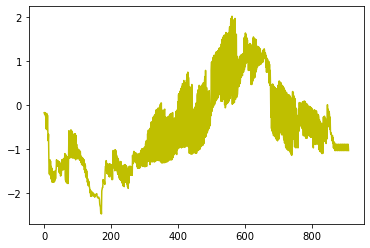

In [124]:
plt.plot(dright_idx['anlval'],'y')

(array([  6.,  20.,  22.,  53.,  83., 106., 121.,  81.,  47.,  42.,  62.,
         53.,  51.,  38.,  22.,  31.,  30.,  22.,  12.,   8.]),
 array([-2.48  , -2.2555, -2.031 , -1.8065, -1.582 , -1.3575, -1.133 ,
        -0.9085, -0.684 , -0.4595, -0.235 , -0.0105,  0.214 ,  0.4385,
         0.663 ,  0.8875,  1.112 ,  1.3365,  1.561 ,  1.7855,  2.01  ]),
 <BarContainer object of 20 artists>)

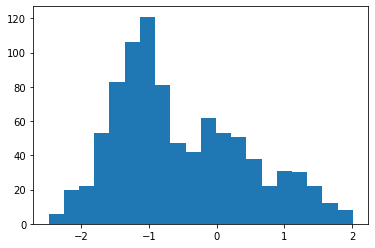

In [125]:
plt.hist(dright_idx['anlval'],bins=20)

In [126]:
# 범주형 데이터는 value_counts로 갯수 확인

dright_idx['anlrst'].value_counts()

정상      445
보통가뭄    254
심한가뭄     90
보통습윤     59
극한가뭄     32
심한습윤     29
극한습윤      1
Name: anlrst, dtype: int64

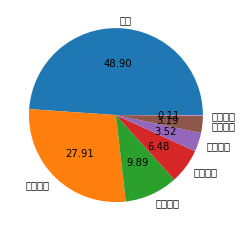

In [93]:
plt.pie(dright_idx['anlrst'].value_counts(),
        labels=dright_idx['anlrst'].value_counts().index,
        autopct = '%.2f')
plt.show()